In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from scipy import stats

In [ ]:
#Loading dataset
df = pd.read_csv('/content/Australian Vehicle Prices.csv')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [ ]:
#Removing nul values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14586 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14586 non-null  object 
 1   Year               14586 non-null  float64
 2   Model              14586 non-null  object 
 3   Car/Suv            14586 non-null  object 
 4   Title              14586 non-null  object 
 5   UsedOrNew          14586 non-null  object 
 6   Transmission       14586 non-null  object 
 7   Engine             14586 non-null  object 
 8   DriveType          14586 non-null  object 
 9   FuelType           14586 non-null  object 
 10  FuelConsumption    14586 non-null  object 
 11  Kilometres         14586 non-null  object 
 12  ColourExtInt       14586 non-null  object 
 13  Location           14586 non-null  object 
 14  CylindersinEngine  14586 non-null  object 
 15  BodyType           14586 non-null  object 
 16  Doors              145

In [ ]:
#Removing unwanted columns
df = df.drop(['Brand','Model','ColourExtInt', 'Location', 'Engine','Car/Suv', 'Title' ], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14586 entries, 0 to 16733
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               14586 non-null  float64
 1   UsedOrNew          14586 non-null  object 
 2   Transmission       14586 non-null  object 
 3   DriveType          14586 non-null  object 
 4   FuelType           14586 non-null  object 
 5   FuelConsumption    14586 non-null  object 
 6   Kilometres         14586 non-null  object 
 7   CylindersinEngine  14586 non-null  object 
 8   BodyType           14586 non-null  object 
 9   Doors              14586 non-null  object 
 10  Seats              14586 non-null  object 
 11  Price              14586 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


**Finding any missing or unacceptable values**

In [ ]:
df.Year.unique()

array([2022., 2011., 2017., 2000., 2013., 2014., 2018., 2016., 2012.,
       2023., 2005., 2015., 2019., 2021., 2007., 2010., 2003., 2008.,
       2006., 2009., 2020., 1999., 2004., 2002., 1995., 2001., 1985.,
       1998., 1997., 1986., 1996., 1994., 1990., 1993., 1991., 1989.,
       1984., 1978., 1992.])

In [ ]:
#Converting Year values to intiger values
df['Year'] = df['Year'].apply(lambda x: int(x))

In [ ]:
df.UsedOrNew.unique()

array(['DEMO', 'USED', 'NEW'], dtype=object)

In [ ]:
#Taking only used vehicle prices
df = df[df['UsedOrNew'] == 'USED']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13517 entries, 1 to 16733
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               13517 non-null  int64 
 1   UsedOrNew          13517 non-null  object
 2   Transmission       13517 non-null  object
 3   DriveType          13517 non-null  object
 4   FuelType           13517 non-null  object
 5   FuelConsumption    13517 non-null  object
 6   Kilometres         13517 non-null  object
 7   CylindersinEngine  13517 non-null  object
 8   BodyType           13517 non-null  object
 9   Doors              13517 non-null  object
 10  Seats              13517 non-null  object
 11  Price              13517 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [ ]:
df.Transmission.unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [ ]:
df = df[df['Transmission'] != '-']

In [ ]:
df.Transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
df.DriveType.unique()

array(['Front', 'Rear', 'AWD', '4WD', 'Other'], dtype=object)

In [ ]:
df.FuelType.unique()

array(['Premium', 'Unleaded', 'Diesel', 'Hybrid', '-', 'Electric', 'LPG',
       'Leaded'], dtype=object)

In [ ]:
df = df[df['FuelType'] != '-']

In [ ]:
df.FuelType.unique()

array(['Premium', 'Unleaded', 'Diesel', 'Hybrid', 'Electric', 'LPG',
       'Leaded'], dtype=object)

In [ ]:
df.FuelConsumption.unique()

array(['6.7 L / 100 km', '6.6 L / 100 km', '11 L / 100 km',
       '6 L / 100 km', '5.1 L / 100 km', '8 L / 100 km', '7.1 L / 100 km',
       '4.5 L / 100 km', '9.8 L / 100 km', '6.2 L / 100 km',
       '5.6 L / 100 km', '5.4 L / 100 km', '7.5 L / 100 km',
       '6.1 L / 100 km', '5.8 L / 100 km', '8.4 L / 100 km',
       '4.7 L / 100 km', '7.9 L / 100 km', '8.2 L / 100 km',
       '6.9 L / 100 km', '8.1 L / 100 km', '4.2 L / 100 km',
       '7.7 L / 100 km', '9.1 L / 100 km', '0 L / 100 km',
       '7.4 L / 100 km', '7.6 L / 100 km', '7.8 L / 100 km',
       '9.9 L / 100 km', '8.7 L / 100 km', '10.9 L / 100 km',
       '9.6 L / 100 km', '10 L / 100 km', '8.8 L / 100 km',
       '6.4 L / 100 km', '9 L / 100 km', '6.3 L / 100 km',
       '10.4 L / 100 km', '7.2 L / 100 km', '5.5 L / 100 km',
       '14.5 L / 100 km', '5.9 L / 100 km', '9.3 L / 100 km',
       '11.5 L / 100 km', '7.3 L / 100 km', '9.2 L / 100 km',
       '4.8 L / 100 km', '10.1 L / 100 km', '8.3 L / 100 km',
       '6.5

In [ ]:
#Showing the fuel consumption value in per 100km
df['FuelConsumption'] = df['FuelConsumption'].apply(lambda x: float(x.split(' ')[0]))

In [ ]:
df.FuelConsumption.unique()

array([ 6.7,  6.6, 11. ,  6. ,  5.1,  8. ,  7.1,  4.5,  9.8,  6.2,  5.6,
        5.4,  7.5,  6.1,  5.8,  8.4,  4.7,  7.9,  8.2,  6.9,  8.1,  4.2,
        7.7,  9.1,  0. ,  7.4,  7.6,  7.8,  9.9,  8.7, 10.9,  9.6, 10. ,
        8.8,  6.4,  9. ,  6.3, 10.4,  7.2,  5.5, 14.5,  5.9,  9.3, 11.5,
        7.3,  9.2,  4.8, 10.1,  8.3,  6.5,  8.6,  5.2,  8.9,  4.9,  8.5,
       10.5, 10.3, 12.2,  7. ,  9.5, 16. ,  9.4,  6.8,  4.6, 11.6,  5.3,
        9.7, 10.6, 11.8, 10.2,  3.3,  5.7, 10.8, 13.6, 10.7, 11.3, 14.6,
       13. ,  4.1,  3.6, 12.1, 17.2, 12.3, 12.8, 13.3, 12.7, 13.2, 15.1,
        3.9,  5. , 14.8, 11.7, 16.4, 13.7, 12.6, 11.2, 13.8,  4.4, 11.1,
       12.4,  4. , 12. ,  3.8,  1.9, 11.4, 13.5, 27. , 11.9, 14.4, 13.4,
       14.9, 20. , 15.4, 15.5, 12.5, 17. , 16.8,  1.7, 12.9, 13.9, 13.1,
       15. , 17.1,  4.3, 18.3, 14. , 14.2, 15.2, 15.3, 14.3, 15.7,  3.5,
        2.6, 19.8, 18.6, 16.2, 18.1,  2.4, 19.1, 17.4, 16.9, 20.7, 19. ,
       14.1,  3.7, 16.5,  2.5,  3.4, 14.7, 17.8, 16

In [ ]:
df.Kilometres.unique()

array(['16', '8472', '136517', ..., '32977', '85525', '31852'],
      dtype=object)

In [ ]:
df = df[df['Kilometres'] != '-']

In [ ]:
df['Kilometres'] = df['Kilometres'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df.Kilometres.unique()

array([    16,   8472, 136517, ...,  32977,  85525,  31852])

In [ ]:
df.CylindersinEngine.unique()

array(['4 cyl', '8 cyl', '3 cyl', '6 cyl', '5 cyl', '12 cyl', '0 L',
       '2 cyl', '10 cyl'], dtype=object)

In [ ]:
df['CylindersinEngine'] = df['CylindersinEngine'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df.CylindersinEngine.unique()

array([ 4,  8,  3,  6,  5, 12,  0,  2, 10])

In [ ]:
df.BodyType.unique()

array(['Hatchback', 'Coupe', 'SUV', 'Commercial', 'Sedan', 'Ute / Tray',
       'People Mover', 'Convertible', 'Wagon', 'Other'], dtype=object)

In [ ]:
df.Doors.unique()

array([' 5 Doors', ' 2 Doors', ' 4 Doors', ' 3 Doors'], dtype=object)

In [ ]:
df['Doors'] = df['Doors'].apply(lambda x: int(x.split(' ')[1]))

In [ ]:
df.Seats.unique()

array([' 5 Seats', ' 4 Seats', ' 2 Seats', ' 7 Seats', ' 3 Seats',
       ' 14 Seats', ' 8 Seats', ' 6 Seats', ' 9 Seats', ' 11 Seats',
       ' 12 Seats', ' 22 Seats'], dtype=object)

In [ ]:
df['Seats'] = df['Seats'].apply(lambda x: int(x.split(' ')[1]))

In [ ]:
df.Price.unique()

array(['19990', '108988', '32990', ..., '27850', '32856', '36770'],
      dtype=object)

In [ ]:
df = df[df['Price'] != 'POA']

In [ ]:
df['Price'] = df['Price'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13464 entries, 1 to 16733
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               13464 non-null  int64  
 1   UsedOrNew          13464 non-null  object 
 2   Transmission       13464 non-null  object 
 3   DriveType          13464 non-null  object 
 4   FuelType           13464 non-null  object 
 5   FuelConsumption    13464 non-null  float64
 6   Kilometres         13464 non-null  int64  
 7   CylindersinEngine  13464 non-null  int64  
 8   BodyType           13464 non-null  object 
 9   Doors              13464 non-null  int64  
 10  Seats              13464 non-null  int64  
 11  Price              13464 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.3+ MB


In [ ]:
#No need of UsedOrNew column
df1 =df.drop('UsedOrNew', axis='columns')

In [ ]:
df1.head()

,Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
1,2022,Automatic,Front,Premium,6.7,16,4,Hatchback,5,5,19990
2,2022,Automatic,Rear,Premium,6.6,8472,4,Coupe,2,4,108988
3,2011,Automatic,Rear,Premium,11.0,136517,8,Coupe,2,4,32990
4,2022,Automatic,Front,Unleaded,6.0,1035,4,SUV,4,5,34990
6,2017,Automatic,AWD,Diesel,5.1,67662,4,SUV,2,4,62280


In [ ]:
df1.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
count,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000
mean,2015.729501,7.777332,107277.143197,4.454620,4.015746,5.114231,33314.086601
std,4.765517,2.217732,76083.008686,1.108142,0.684972,1.105728,27758.989750
min,1978.000000,0.000000,1.000000,0.000000,2.000000,2.000000,88.000000
25%,2013.000000,6.600000,50426.000000,4.000000,4.000000,5.000000,17990.000000
50%,2017.000000,7.600000,91671.000000,4.000000,4.000000,5.000000,27890.000000
75%,2019.000000,8.800000,152159.750000,4.000000,4.000000,5.000000,39990.000000
max,2023.000000,27.000000,526162.000000,12.000000,5.000000,22.000000,649880.000000


In [ ]:
#Since we are only interested in used vehicle prices we can removes entries whose Kilometres values are lower than 5000km
df2 = df1[df1.Kilometres.apply(lambda x: x >= 5000)]
df2.head()

,Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
2,2022,Automatic,Rear,Premium,6.6,8472,4,Coupe,2,4,108988
3,2011,Automatic,Rear,Premium,11.0,136517,8,Coupe,2,4,32990
6,2017,Automatic,AWD,Diesel,5.1,67662,4,SUV,2,4,62280
7,2000,Automatic,Front,Unleaded,8.0,300539,4,Hatchback,5,5,2995
8,2013,Automatic,Rear,Premium,7.1,82012,4,Coupe,2,4,24888


In [ ]:
df2.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
count,13124.000000,13124.000000,13124.000000,13124.000000,13124.000000,13124.000000,13124.000000
mean,2015.566672,7.798514,110012.850731,4.458473,4.015011,5.117266,32254.205425
std,4.709342,2.198266,75114.158429,1.092128,0.679886,1.098811,25428.640657
min,1978.000000,0.000000,5045.000000,0.000000,2.000000,2.000000,88.000000
25%,2013.000000,6.600000,53343.000000,4.000000,4.000000,5.000000,17965.000000
50%,2017.000000,7.600000,93771.000000,4.000000,4.000000,5.000000,26990.000000
75%,2019.000000,8.800000,154180.500000,4.000000,4.000000,5.000000,38990.000000
max,2023.000000,27.000000,526162.000000,12.000000,5.000000,14.000000,649880.000000


**Visualizing data**

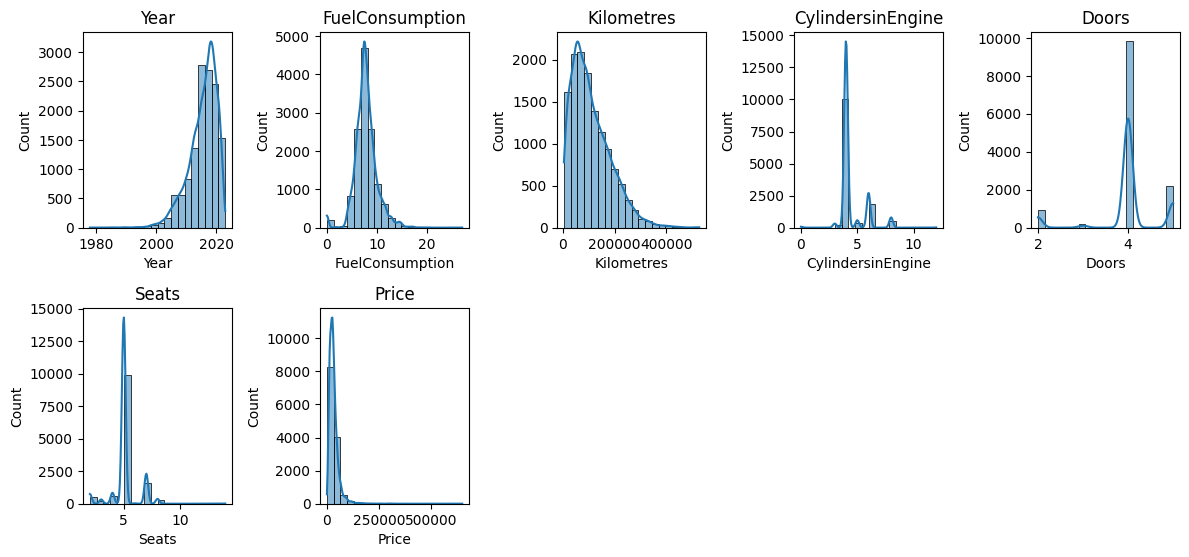

In [ ]:
numerical_features = ['Year', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors',
                      'Seats', 'Price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df2[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

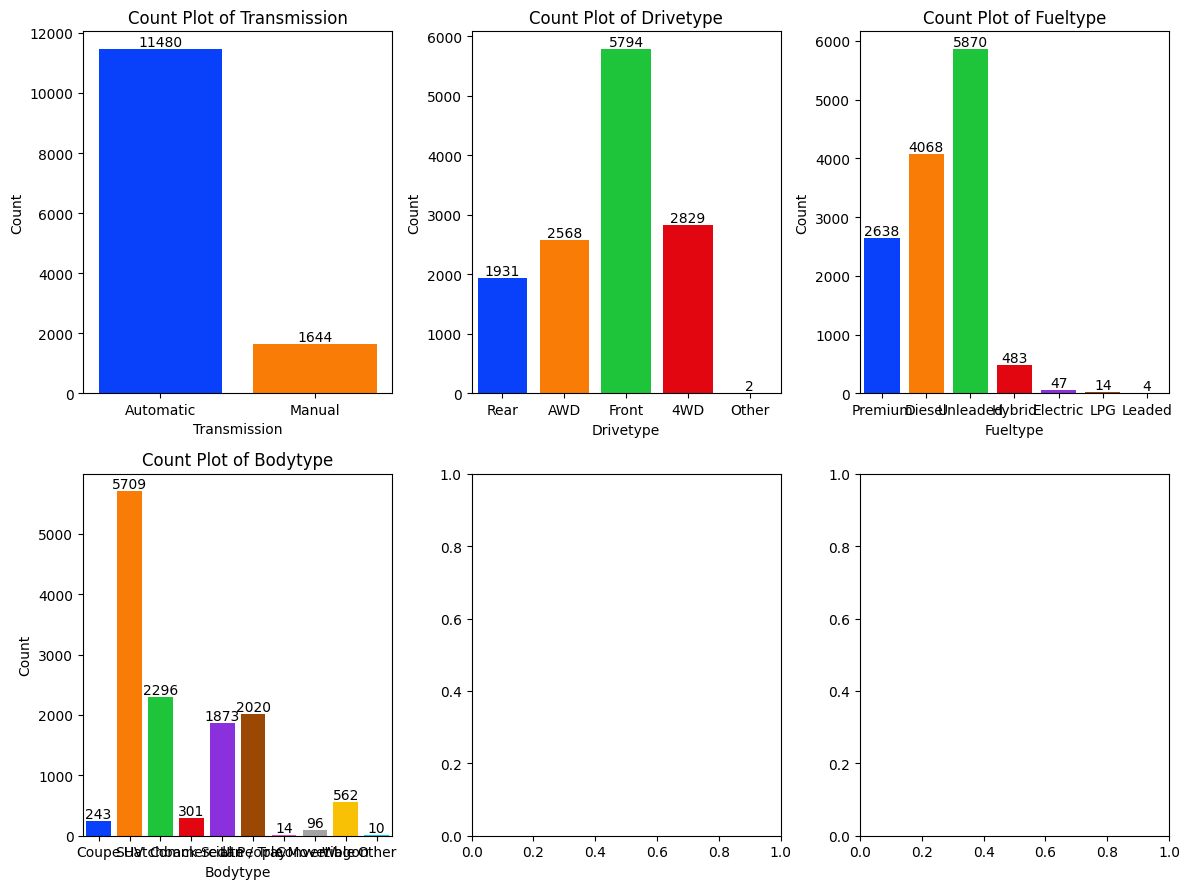

In [ ]:
categorical_features = ['Transmission', 'DriveType', 'FuelType',
                       'BodyType']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_features):
    sns.countplot(x=df2[column], data=df2, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

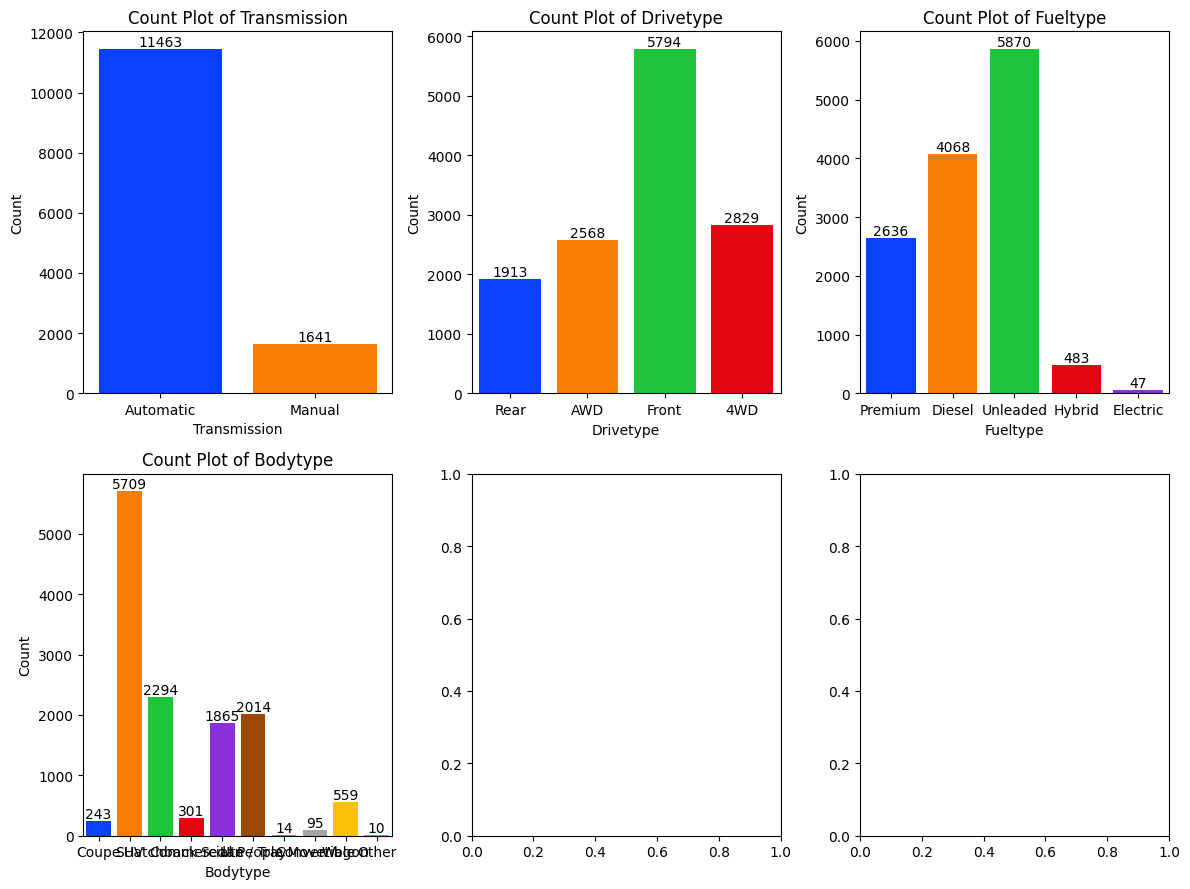

In [ ]:
#Since the count of 'Other' category in Drivetype column and 'LPG' and 'Leaded' categories n FuelType column are low we can remove them
df3 = df2[df2['DriveType'] != 'Other']
df4 = df3[df3['FuelType'] != 'LPG']
df5 = df4[df4['FuelType'] != 'Leaded']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_features):
    sns.countplot(x=df5[column], data=df5, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

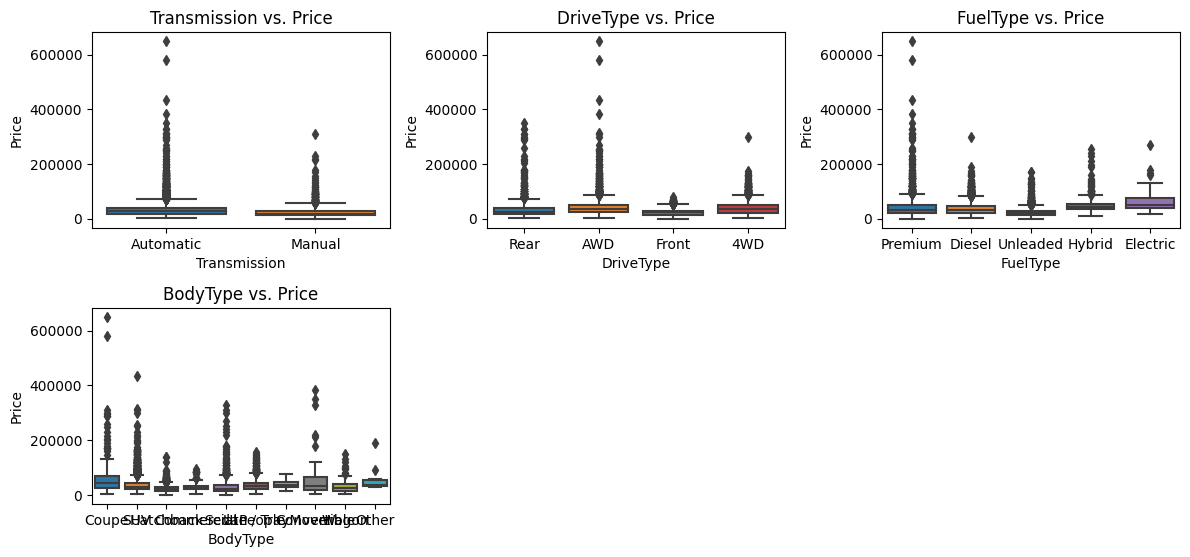

In [ ]:
plt.figure(figsize=(12, 8))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=df5, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [ ]:
#Removing outliers
df5[df5.Price >= 400000]

,Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
3036,2019,Automatic,AWD,Premium,12.7,44329,8,SUV,4,4,435000
5271,2019,Automatic,AWD,Premium,15.3,11480,12,Coupe,2,4,579888
10358,2012,Automatic,AWD,Premium,17.2,27843,12,Coupe,2,2,649880


In [ ]:
df6 = df5[df5['Price'] <= 400000]
df6.head()

,Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
2,2022,Automatic,Rear,Premium,6.6,8472,4,Coupe,2,4,108988
3,2011,Automatic,Rear,Premium,11.0,136517,8,Coupe,2,4,32990
6,2017,Automatic,AWD,Diesel,5.1,67662,4,SUV,2,4,62280
7,2000,Automatic,Front,Unleaded,8.0,300539,4,Hatchback,5,5,2995
8,2013,Automatic,Rear,Premium,7.1,82012,4,Coupe,2,4,24888


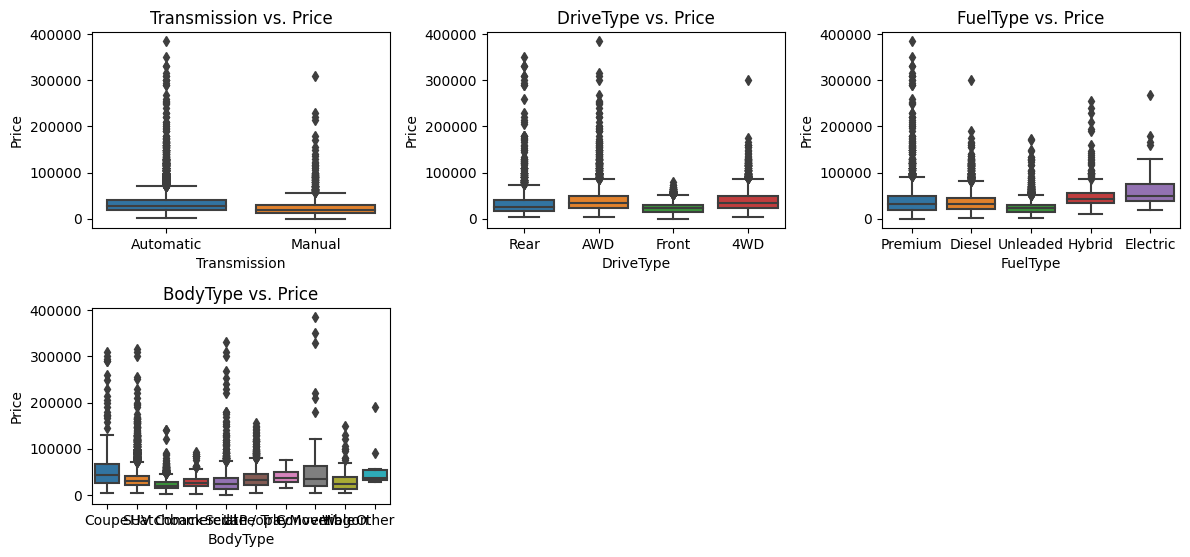

In [ ]:
plt.figure(figsize=(12, 8))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=df6, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [ ]:
df6.BodyType.value_counts()

SUV             5708
Hatchback       2294
Ute / Tray      2014
Sedan           1865
Wagon            559
Commercial       301
Coupe            241
Convertible       95
People Mover      14
Other             10
Name: BodyType, dtype: int64

In [ ]:
#We can remove 'People Mover'and 'Other' from BodyType
df7 = df6[df6['BodyType'] != 'People Mover']
df8 = df7[df7['BodyType'] != 'Other']
df8.BodyType.value_counts()

SUV            5708
Hatchback      2294
Ute / Tray     2014
Sedan          1865
Wagon           559
Commercial      301
Coupe           241
Convertible      95
Name: BodyType, dtype: int64

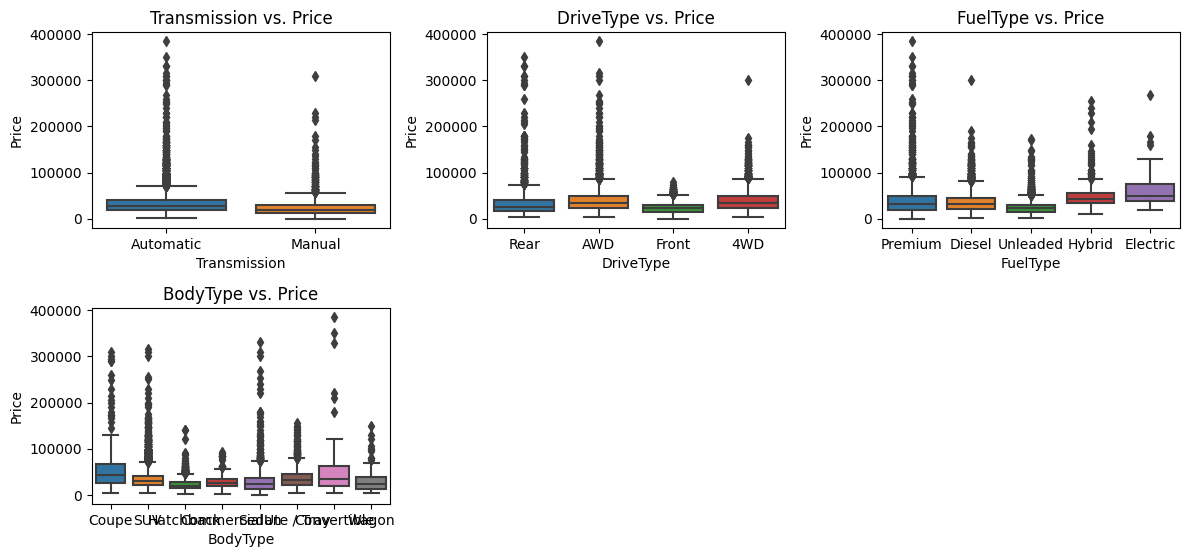

In [ ]:
plt.figure(figsize=(12, 8))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=df8, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [ ]:
df8['Z_score'] = df8.groupby('Transmission')['Price'].transform(lambda x: stats.zscore(x))

# Define a threshold for Z-score (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Filter out rows with Z-scores outside the threshold
df9 = df8[abs(df8['Z_score']) <= z_score_threshold]

# Drop the 'Z_score' column as it's no longer needed
df10 = df9.drop(columns='Z_score')

<ipython-input-198-d318d30c352f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Z_score'] = df8.groupby('Transmission')['Price'].transform(lambda x: stats.zscore(x))


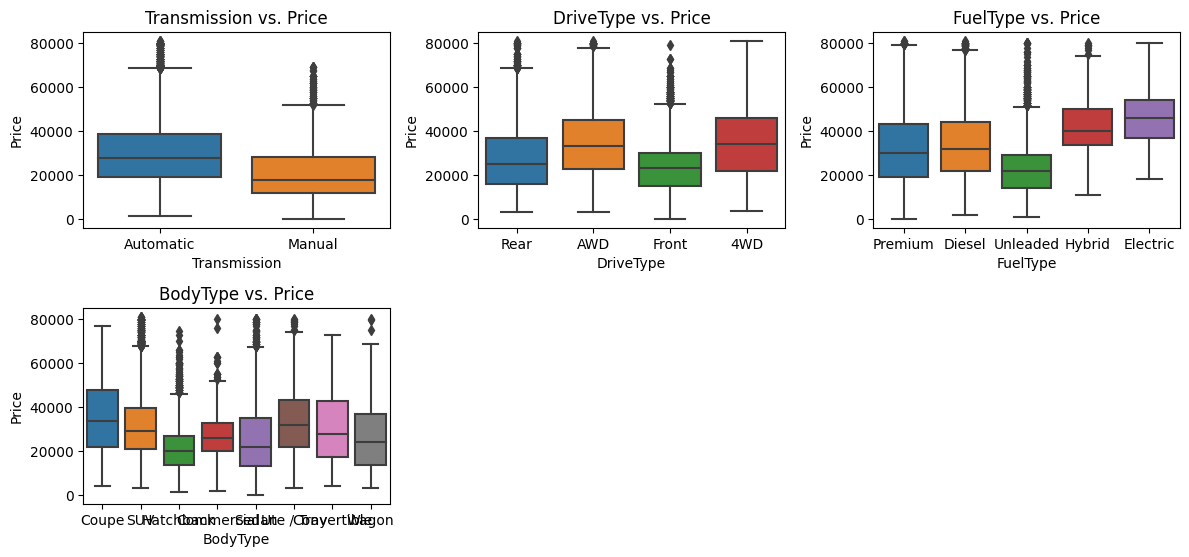

In [ ]:
plt.figure(figsize=(12, 8))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=df10, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

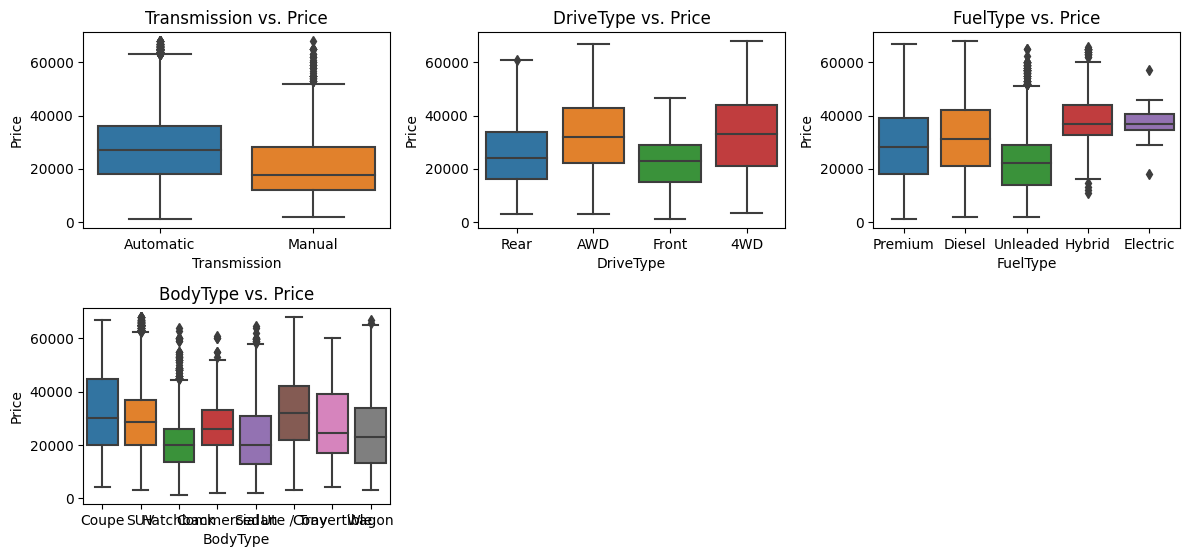

In [ ]:
df10['Z_score'] = df10.groupby('DriveType')['Price'].transform(lambda x: stats.zscore(x))

# Filter out rows with Z-scores outside the threshold
df11 = df10[abs(df10['Z_score']) <= z_score_threshold]

# Drop the 'Z_score' column as it's no longer needed
df12 = df11.drop(columns='Z_score')

plt.figure(figsize=(12, 8))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=df12, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

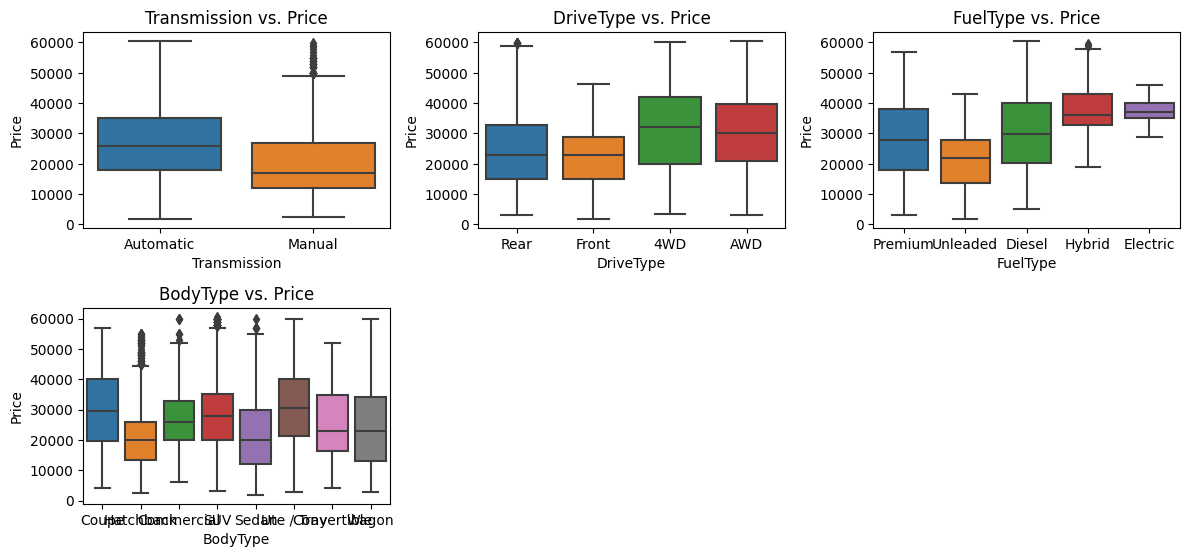

In [ ]:
df12['Z_score'] = df12.groupby('FuelType')['Price'].transform(lambda x: stats.zscore(x))

# Filter out rows with Z-scores outside the threshold
df13 = df12[abs(df12['Z_score']) <= z_score_threshold]

# Drop the 'Z_score' column as it's no longer needed
df14 = df13.drop(columns='Z_score')

plt.figure(figsize=(12, 8))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=df14, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

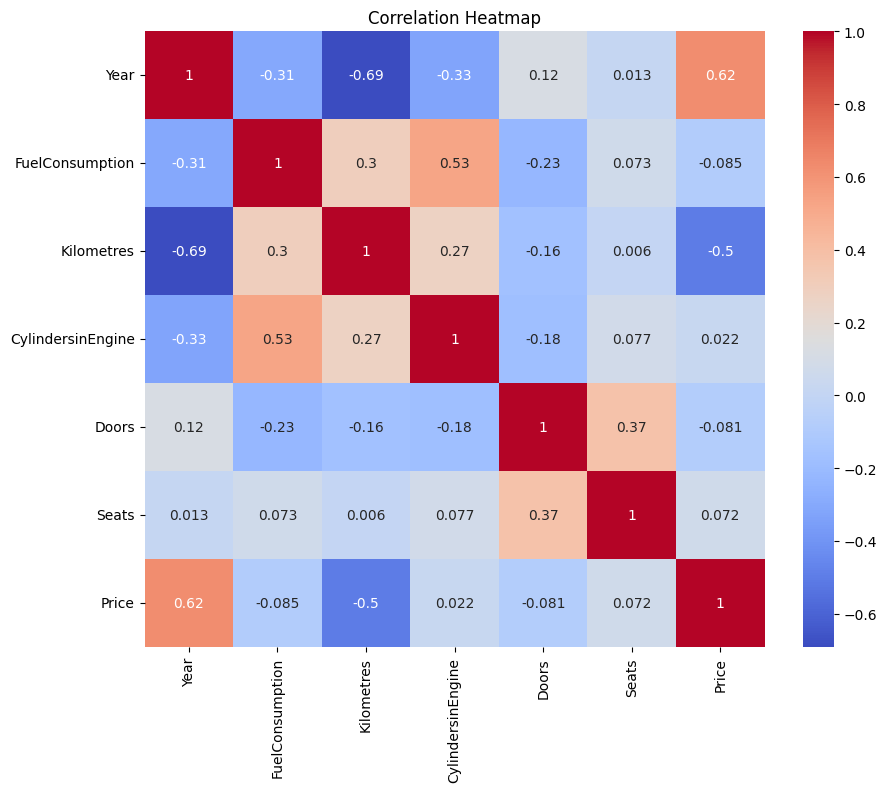

In [ ]:
correlation_matrix = df14[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#df14 = df14.drop('Seats', axis='columns')

In [205]:
#Ordinary encoding of categorical features
categorical_features = ['Transmission', 'DriveType', 'FuelType','BodyType'
                       ]
label_encoder = LabelEncoder()
for column in categorical_features:
    df14[column] = label_encoder.fit_transform(df14[column])
    encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(encoding_mapping)

{'Automatic': 0, 'Manual': 1}
{'4WD': 0, 'AWD': 1, 'Front': 2, 'Rear': 3}
{'Diesel': 0, 'Electric': 1, 'Hybrid': 2, 'Premium': 3, 'Unleaded': 4}
{'Commercial': 0, 'Convertible': 1, 'Coupe': 2, 'Hatchback': 3, 'SUV': 4, 'Sedan': 5, 'Ute / Tray': 6, 'Wagon': 7}


In [206]:
df14.head()

,Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
3,2011,0,3,3,11.0,136517,8,2,2,4,32990
7,2000,0,2,4,8.0,300539,4,3,5,5,2995
8,2013,0,3,3,7.1,82012,4,2,2,4,24888
11,2018,0,3,4,9.8,16324,4,0,4,2,41999
14,2016,0,3,0,8.0,229829,4,0,4,2,27995


**Model selection**

In [207]:
X = df14.drop(['Price'], axis='columns')
Y = df14.Price
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10)

In [208]:
#Linear regression model
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.6378979762244734, 0.645528519663528)

In [ ]:
#ridge_reg = Ridge(alpha=5)  # You can adjust the alpha parameter
#ridge_reg.fit(X_train, Y_train)
#ridge_reg.score(X_train, Y_train),ridge_reg.score(X_test, Y_test)

In [209]:
#Cross validation
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)

cross_val_score(LinearRegression(), X,Y,cv=cv)

array([0.63816201, 0.65365576, 0.6629259 , 0.64005316, 0.65830385])

In [210]:
#Finding best model
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [100, 150],
                'random_state' : [40, 60]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.650620,{}
1,lasso,0.650616,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.705612,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.838607,"{'n_estimators': 150, 'random_state': 60}"


In [211]:
#Random forest regression model
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=60, max_depth=15)
rf_regressor.fit(X_train, Y_train)
rf_regressor.score(X_train, Y_train), rf_regressor.score(X_test, Y_test)

(0.9618612682554979, 0.831232512510625)

In [212]:
#Saving the model
with open('rf_regressor_model_AUS_car.pickle','wb') as f:
    pickle.dump(rf_regressor,f)

In [219]:
rf_regressor1  = RandomForestRegressor(n_estimators=150, random_state=60, max_depth=25)
rf_regressor1.fit(X_train, Y_train)
rf_regressor1.score(X_train, Y_train), rf_regressor1.score(X_test, Y_test)

(0.9767961980705355, 0.8312108006254036)

In [223]:
def predict_price(Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats):

    x = np.zeros(len(X.columns))
    x[0] = Year
    x[1] = Transmission
    x[2] = DriveType
    x[3] = FuelType
    x[4] = FuelConsumption
    x[5] = Kilometres
    x[6] = CylindersinEngine
    x[7] = BodyType
    x[8] = Doors
    x[9] = Seats

    return rf_regressor.predict([x])

In [225]:
predict_price(2020,0,0,0,10,20000,2,0,4,4)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


37000.12066666666